# **Lecture** Making Functions to Control Sound in Python 

In order to perform experiments, we have to deliver stimuli and collect responses from participants in an experiment.

It makes the most sense to do that on a computer where we can precisely control stimulus presentation, and collect behavioral responses in data files ready for analysis.  
 
There are stimulus, control, and data organization issues that arise in designing and carrying out an experiment that are intimately linked to the design of the experiment. 

One size rarely fits all, and for a Psychologist doing research, the ability to program means the ability to implement an experiment precisely as they want to.  The same is true for a Neuroscientist.  

Nowadays, many (most?) psychological experiments are done online.  Even here, you have to program the experiment either in Python or Java Script.  

There are also some more general principles of how to organize a program that I will also be introducing.  

### Why sound? 

Most experiments make use of visual stimuli, and in Python there is a module called Psychopy that many labs use for that. 

However, programming visual displays is extremely hardware dependent so for this class we will focus using sound stimuli as sound cards are more consistent across computers. 

### `sounddevice` module

In this section we will learn how make use of python to deliver an auditory stimulus using the 
`sounddevice` module.  

To install sounddevice, open either a Terminal (mac) or PowerShell prompt from Anaconda Navigator (windows).

Be sure you see the term (base) to the left of the prompt, then type 

    pip install sounddevice 

`pip` is a package manager for external python modules (those not managed by Anaconda).  

### **SHOULD YOU HAVE ISSUES WITH INSTALLATION** 
Contact me or one of the readers! 
 

In [ ]:
import numpy as np 
from numpy import random 
import sounddevice as sd
from matplotlib import pyplot as plt
rng = random.default_rng(seed = 1111)

### Pure Tones

The simplest auditory stimuli is a pure tone.  A pure tone is a sine wave of a particular frequency. 

It is perceived as having a particular pitch, which you may identify as a musical note. 

In [ ]:
# create a sinusoidal sound wave
sr = 44100     # how many samples per second 
               #This is the optimal choice for modern sound cards 
time = 0.5     # duration 
volume = 0.5   # DO NOT EXCEED 0.5

frequency = 440 # cycles per second 
time_vec = np.linspace(0, time, int(time*sr)) 
test_note = np.sin(frequency * time_vec  * 2 * np.pi)
# 2^ 
# FOR SAFETY.  PLEASE LIMIT THE MAXIMUM VOLUME!
test_note  = volume*(test_note / np.max(np.abs(test_note)))  
# the sample amplitude values must consequently fall in the range of -32768 to 32767. 
test_note = 32768*test_note
# they must also have a signed 16-bit integer dtype (=2 bytes) and 
test_note  = test_note.astype(np.int16) #the astype method changes the data type

sd.play(test_note , sr,blocking=True) 
#the parameters here are
#sd.play(sound_array,sample_rate) 
# I added, blocking=True to prevent anything else taking command of the sound card, while I am playing my tone. 

### Quick review of sine functions

$x = sin(\theta)$ where $\theta$ ranges from 0 to $2\pi$

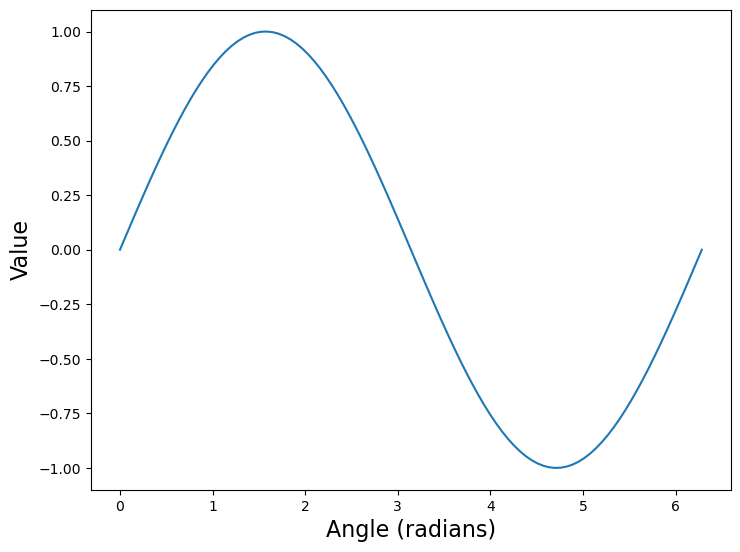

In [ ]:
angle_vec = np.linspace(0,2*np.pi,100) # I am using linspace to make 100 samples between 0 and 2*pi
sinefunction = np.sin(angle_vec) #I apply a sin function to theta. 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(angle_vec,sinefunction)
ax.set_xlabel('Angle (radians)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
plt.show()


### The concept of frequency 

A physicist would tell you frequency is rate of change of phase 

A more intutitive way to say that is that frequency is the number of times the sine function completes a cycle in the period from 0 to $2\pi$

$x = sin(n\theta)$ where $\theta$ ranges from 0 to $2\pi and n can be any real number$

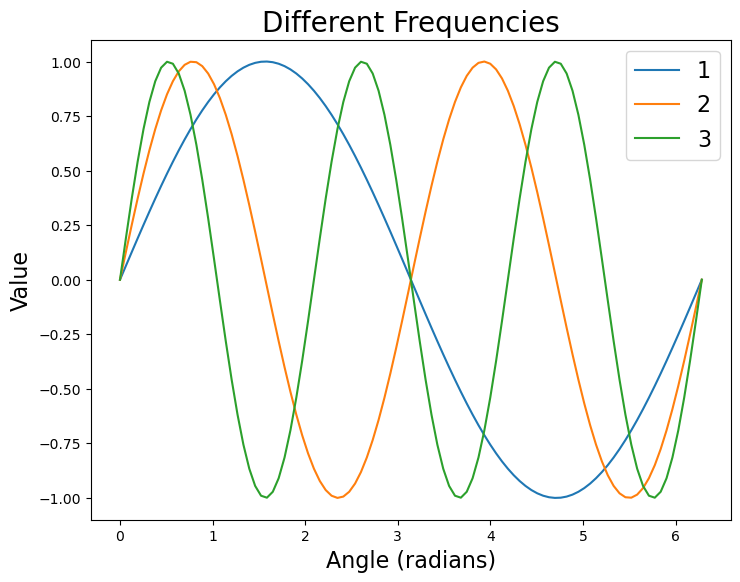

In [ ]:
angle_vec = np.linspace(0,2*np.pi,100)# I am using linspace to make 100 samples between 0 and 2*pi
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Angle (radians)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
for n in range(1,4,1):   # I am looping over 3 values of n
    sinefunction = np.sin((n*angle_vec))
    ax.plot(angle_vec,sinefunction,label = str(n))
ax.legend(fontsize = 16)    
ax.set_title('Different Frequencies',fontsize = 20)
plt.show()

### Sound unfolds over time. 

Sounds are pressure waves unfolding over time.  

If we want to make use of our sinusoid as sound stimuli, we need to think about them as a function of time. 

In [ ]:
duration = 1 # seconds 
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi  # This is a mapping between time and angle.  In this line of code
                                # I am mapping 1 second of time to the the interval 0 to 2 pi
frequency = 1
sinefunction = np.sin(frequency*anglesteps)



- Now, when I plot this, the x-axis is time 

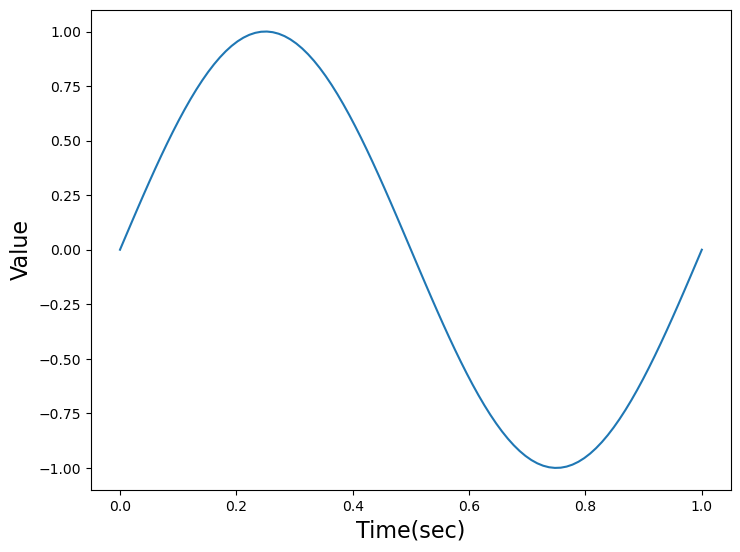

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(timesteps,sinefunction)
ax.set_xlabel('Time(sec)',fontsize = 16)
ax.set_ylabel('Value',fontsize = 16)
plt.show()

### Units in Sound 

There are several quantities relevant to describing sound
* frequency.  The frequency of sound is described in units of Hz or cycles per second. 
* Amplitude.  The Amplitude of the sound is the size of the wave. The units here (for programming purposes) are arbitrary, since the true amplitude also depends on your sound card, the controls on your computer, etc. 

 $x = A*sin(2*\pi*f*t))$  where f is frequency and A is amplitude and t is time

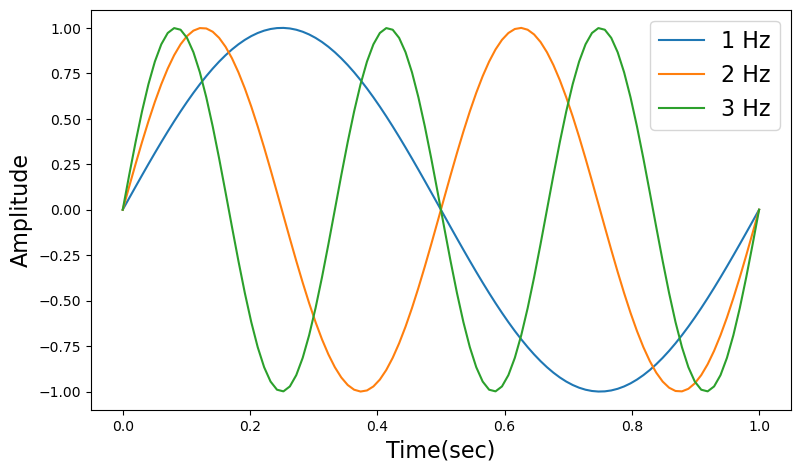

In [ ]:
#In this example I manipulate frequency 
duration = 1 #in seconds
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])
for frequency in range(1,4,1):
    sinefunction = np.sin(frequency*anglesteps)
    ax.plot(timesteps,sinefunction,label=str(frequency)+' Hz')
ax.set_xlabel('Time(sec)',fontsize = 16)
ax.set_ylabel('Amplitude',fontsize = 16)
ax.legend(fontsize = 16)
plt.show()

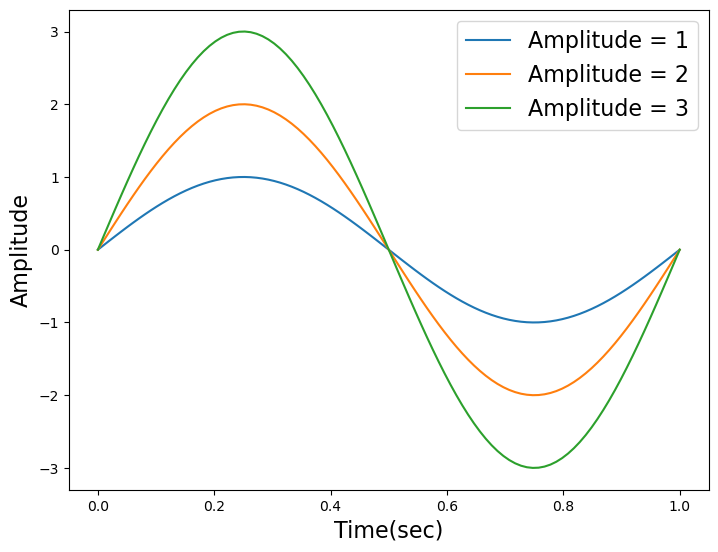

In [ ]:
#In this example I manipulate Amplitude 
duration = 1
timesteps = np.linspace(0,duration,100)
anglesteps = timesteps*2*np.pi
frequency = 1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for Amplitude in range(1,4,1):
    sinefunction = Amplitude*np.sin(frequency*anglesteps)
    ax.plot(timesteps,sinefunction,label='Amplitude = ' + str(Amplitude))
ax.set_xlabel('Time(sec)',fontsize =16)
ax.set_ylabel('Amplitude',fontsize =16)
ax.legend(fontsize=16)
plt.show()

### Sampling Rate

When we make sound with a musical instrument or your voice it is an **analog** signal that is continuous in time. 

When specifying sound on a computer, it is a **digital** signal that we have represent it as a discrete set of numbers. 

Thus, we have to make a sound with a particular **sampling rate** or number of samples per second. 

Sampling rate is a frequency that specifies how often we represent a sample of sound 
(Notice this unit is also Hz).  

In the examples above, the sampling rate was implicitly 100 samples/second or 100 Hz in my `linspace`` command. 

The sampling rate you need depends largely on the type of frequencies you need to represent. 

Human beings can hear sounds from 20 Hz up to around 20,000 Hz.  (really 15,000 Hz, and as you get older that gets lower). 

To allow us to play all of these audible sounds, sounds card use a standard sampling rate of 44,100. 

### Sinusoidal pure tone

$ tone = Asin(2\pi f t)$

A pure tone has 2 parameters
- A - volume
-  f - frequency

And it has to be computed at a set of time points that define its duration.  
- t - discrete time points 


In [ ]:
# create a sinusoidal sound wave
sr = 44100     # sound card sampling rate
duration = 0.5 # length of the sound in seconds. 
frequency = 300        # frequency of the sinewave in Hz
volume = 0.25   # DO NOT MAKE VOLUME LARGER THAN 0.5 
time = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate. 
tone = np.sin(frequency * time  * 2 * np.pi) # instead of creating a vector angles, just multiply by 2pi 
                                                      #inside the call to the sin function.  


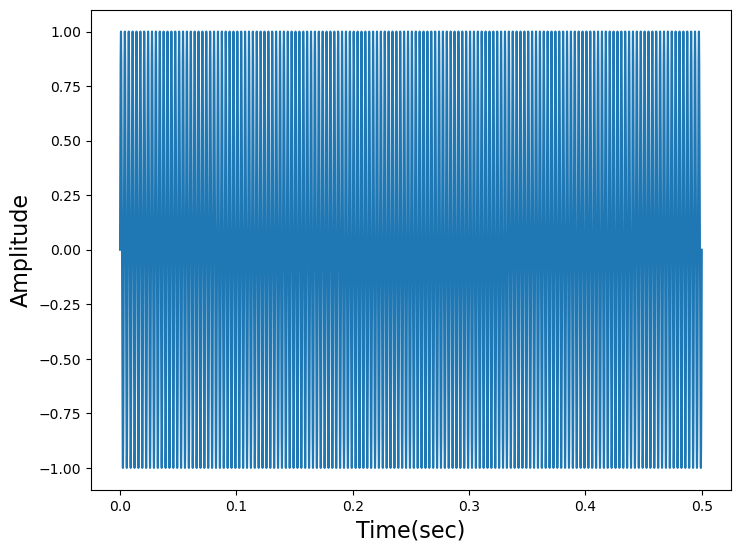

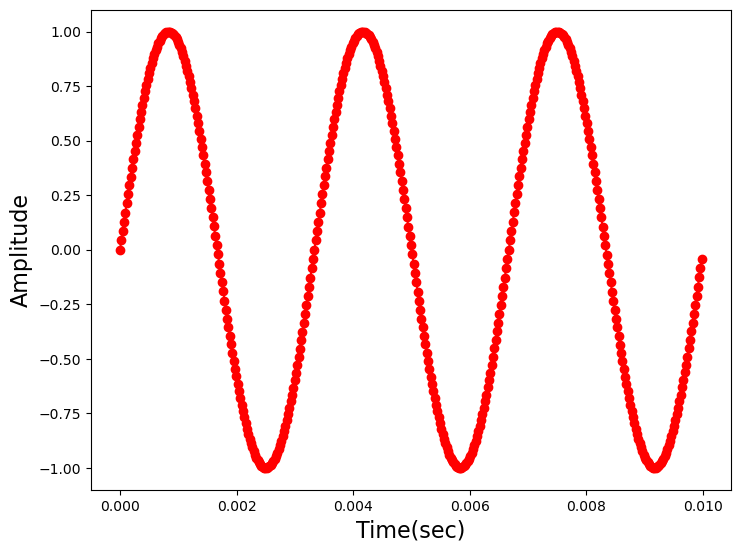

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time,tone)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],tone[0:441],'ro-')
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

A sin function will always return values between -1 and 1

The soundcard expects to get inputs that are 16 bit integers. 

16 bit integers fall in the range of -32768 to 32767

    test_note  = test_note*32767 / np.max(np.abs(test_note)) forces the values to scale so that the 

it fills the range from -32767 to 32767
## NEVER DO THIS! THIS IS DANGEROUS TO YOUR EARS!!!.

- ALWAYS MULTIPLY BY VOLUME THAT is 0.5 of less 

In [ ]:

print('Sound cards range from, ',-2**15,' to ',2**15-1 ) 
tone  = tone*32768 / np.max(np.abs(tone)) # scale to the range of the sound card.   
tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM value of VOLUME to 0.5! 


Sound cards range from,  -32768  to  32767


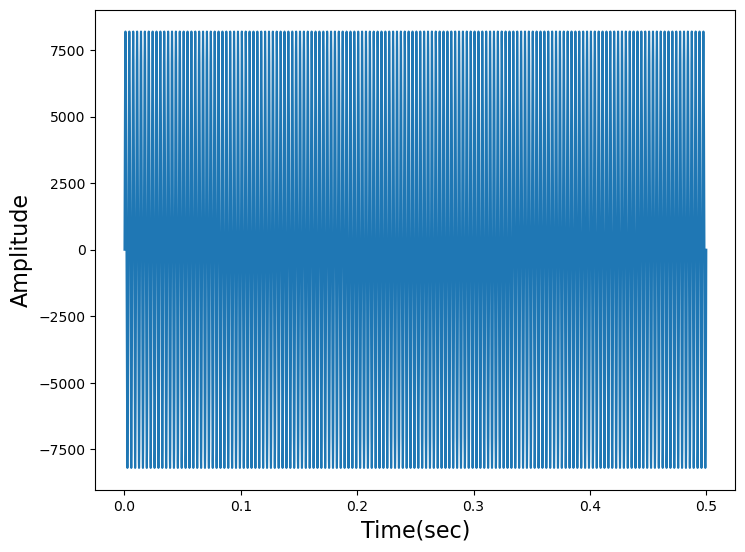

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time,tone)
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()




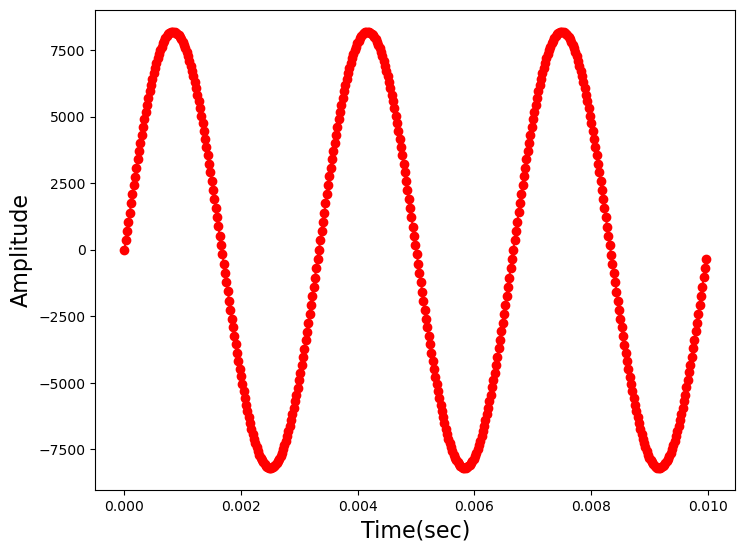

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(time_vec[0:441],tone[0:441],'ro-')
ax.set_xlabel('Time(sec)',fontsize=16)
ax.set_ylabel('Amplitude',fontsize=16)
plt.show()

In [ ]:
test_note  = test_note.astype(np.int16) # always convert to 16 bit integers
sd.play(test_note, sr,blocking=True) 
#there are 4 required paramters here.
#  audio_data - the numpy array or wav object you want to play 
#  sample_rate= sampling rate, or samples per second, default to 44100 (its good practice to specify this)



### Musical notes correspond to different frequencies of sound. 

A can have frequencies 440, 880, 1760, 3520, ....  

These frequencies are the start of an octave that contains 12 different notes. 
### For example:
* A = 440
* Bb = 466 (B flat)
* B = 494
* C = 523
* C# = 554 (C sharp)
* D = 587
* Eb = 622 (E flat)
* E = 659
* F = 698
* F# = 740 (F sharp)
* G = 784
* Ab = 831 (A flat)
-----
* A = 880


- There are a number of ways to organize this information.

- This is ugly 

In [ ]:
notes = ['A','Bb','B','C','C#','D','Eb','F','F#','G','Ab']
freqs = [440,466,494,523,554,587,622,659,698,740,784,831]

- Why is this ugly? 

### Dictionaries 

Dictionaries are a native Python data type that are useful to organize information.  

They can be used to organize any type of variables, including variables, lists, arrays, matrices, and mix types together.  (They are my favorite way to organize information) 

At the core of a dictionary is **key** **value** pairing. 

In [ ]:
prof = dict()
#keys can be strings
prof['First'] = 'Ramesh'
prof['Last'] = 'Srinivasan'
#values can be numeric
prof['age'] = 57
#keys can have spaces 
prof['years at UCI'] = 24
prof['universities'] = ['UPenn','Tulane']
#values can be arrays
prof['dob'] = np.array([1,21,1967])
#keys can be numeric
prof[1] = 'Oregon'
prof[2] = 'Scripps'
prof[3] = 'UCI'

In [ ]:
print(prof)
print(prof.keys())

{'First': 'Ramesh', 'Last': 'Srinivasan', 'age': 57, 'years at UCI': 24, 'universities': ['UPenn', 'Tulane'], 'dob': array([   1,   21, 1967]), 1: 'Oregon', 2: 'Scripps', 3: 'UCI'}
dict_keys(['First', 'Last', 'age', 'years at UCI', 'universities', 'dob', 1, 2, 3])


In [ ]:
dob = prof['dob']
print(dob)

[   1   21 1967]


In [ ]:
notes = dict()
notes = {'A':440,'Bb':466,'B':494,'C':523,'C#':554,'D':587,'Eb':622,'F':659,'F#':698,'G':740,'Ab':831}
#I hate the above syntax, but i see why people do it. i prefer 
#notes['A'] = 440 
#notes['Bb'] = 466
#....

In [ ]:
# play note D
sr = 44100     # sound card sampling rate
duration = 0.5 # length of the sound in seconds. 
frequency = notes['F#']        # frequency of the sinewave in Hz
volume = 0.5   # DO NOT MAKE VOLUME LARGER THAN 0.5 
time = np.linspace(0, duration, int(duration*sr)) # The number of samples is the length of time X sampling rate. 
tone = np.sin(frequency * time  * 2 * np.pi) # instead of creating a vector angles, just multiply by 2pi 


In [99]:

tone  = tone*32768 / np.max(np.abs(tone)) # scale to the range of the sound card. 
tone = volume*tone # FOR SAFETY.  PLEASE LIMIT THE MAXIMIM value of VOLUME to 0.5!   
tone  = tone.astype(np.int16) # always convert to 16 bit integers
sd.play(tone, sr,blocking=True) 